In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from models.mcp import WrapperOOBBinaryConformalClassifier
from plotly_utils import efficiency_curve, reliability_curve, histogram, confusion_matrix, beta_pdf_with_cdf_fill
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix

In [23]:
weights = [0.2, 0.8]

X, y = make_classification(
    n_samples=100000, 
    n_features=20, 
    n_informative=2,      
    weights=weights, 
    random_state=42,
    n_redundant=2)

In [24]:
# Dividir os dados em conjuntos de treinamento, calibração e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [25]:
rf = RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1, class_weight="balanced")
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, oob_score=True,
                       random_state=42)

In [26]:
clf = WrapperOOBBinaryConformalClassifier(rf)
clf.fit(y_train)

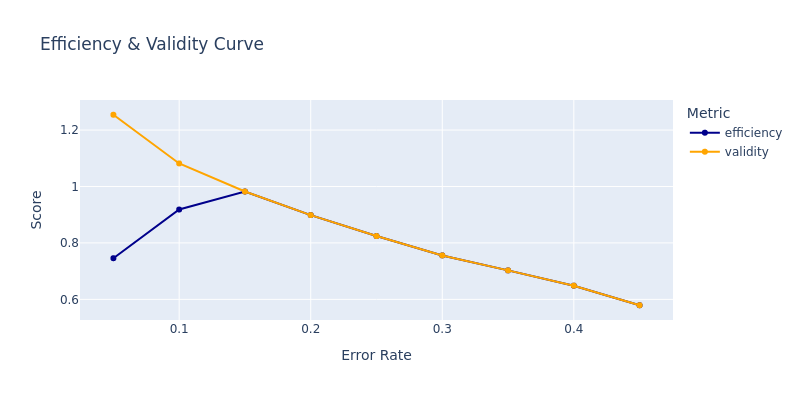

In [27]:
efficiency_curve(clf, X_test, "png")

In [28]:
clf.calibrate_alpha(X_calib, y_calib)


In [29]:
clf.alpha

0.1

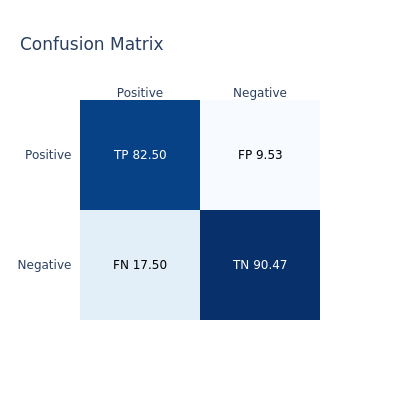

In [30]:
confusion_matrix(clf, X_test, y_test, fig_type="png")

Random Forest

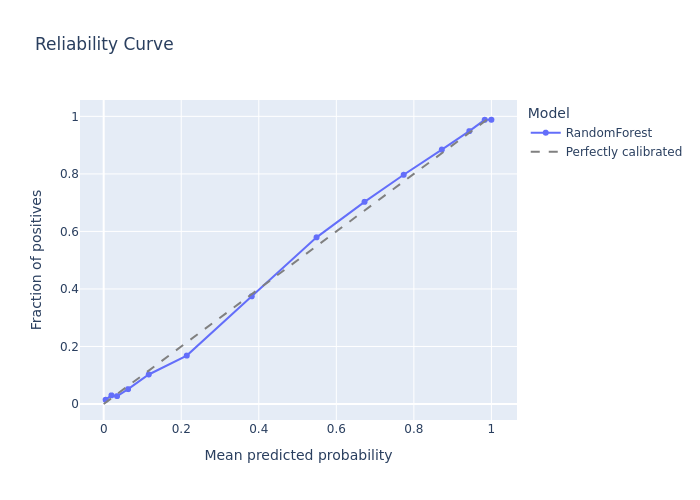

In [31]:
reliability_curve(clf.learner, X_test, y_test, 15,  "png")

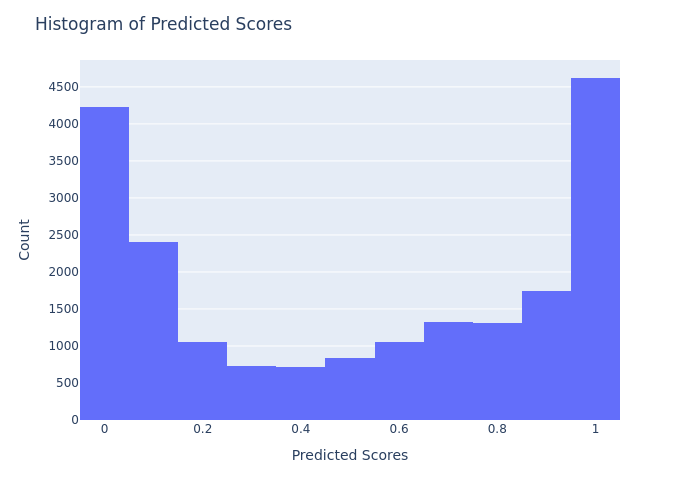

In [32]:
histogram(clf.learner, X_test, 15, "png")

Venn Abers

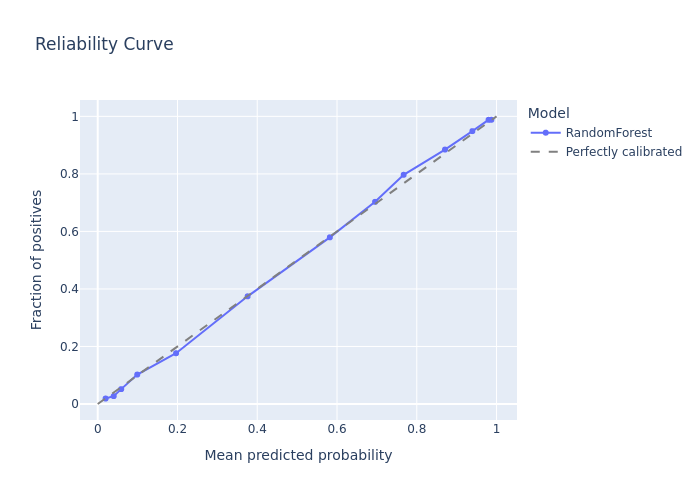

In [33]:
reliability_curve(clf, X_test, y_test, 15, "png")

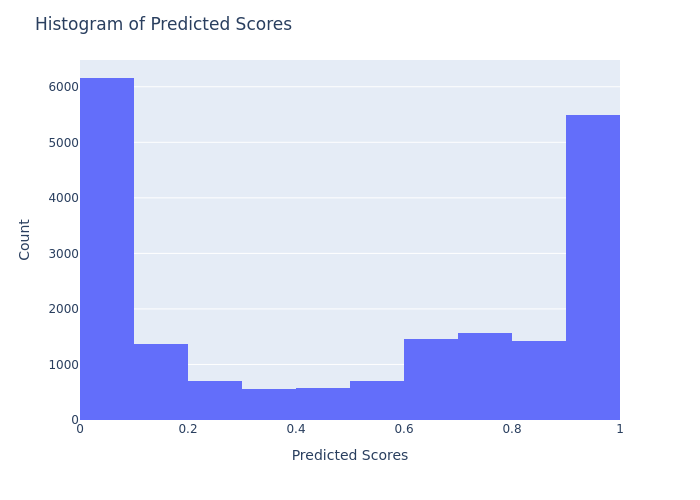

In [34]:
histogram(clf, X_test, 15, "png")

Alpha - 0.05

In [35]:
clf.evaluate(X_test, y_test, alpha=0.05)

,one_c,avg_c,empty,error,log_loss,brier_loss,ece,empirical_coverage,generalization,auc,precision,recall,alpha
0,0.746,1.254,0.0,0.04,0.298,0.091,0.007,1.0,0.001,0.945,0.95,0.67,0.05


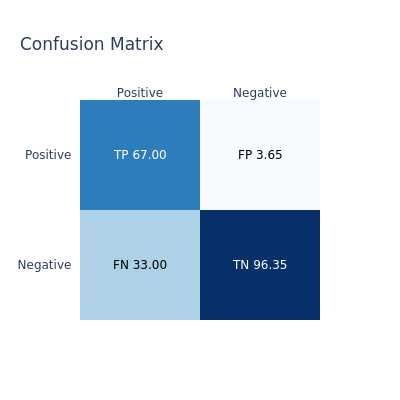

In [36]:
confusion_matrix(clf, X_test, y_test, alpha=0.05, fig_type="png")

Alpha - 0.10

In [37]:
clf.evaluate(X_test, y_test, alpha=0.10)

,one_c,avg_c,empty,error,log_loss,brier_loss,ece,empirical_coverage,generalization,auc,precision,recall,alpha
0,0.918,1.082,0.0,0.091,0.298,0.091,0.007,0.956,0.013,0.945,0.899,0.825,0.1


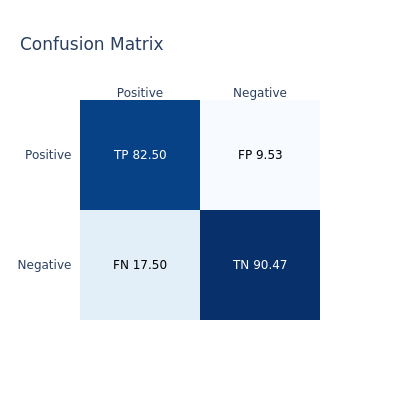

In [38]:
confusion_matrix(clf, X_test, y_test, alpha=0.10, fig_type="png")

In [39]:
tn, fp, fn, tp = sklearn_confusion_matrix(y_test, clf.predict(X_test)).ravel()

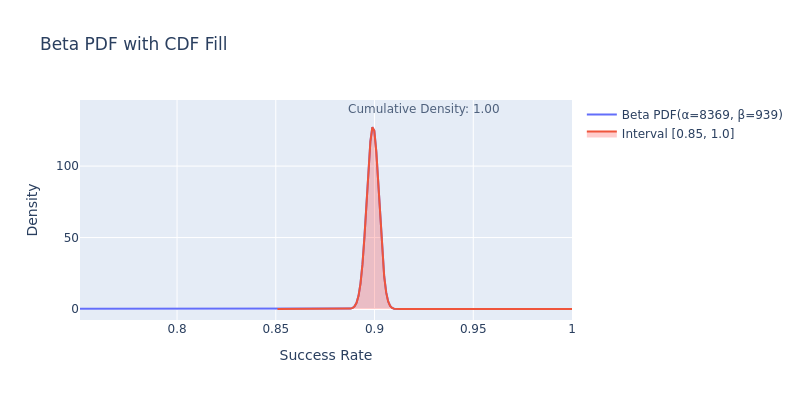

In [40]:
beta_pdf_with_cdf_fill(tp, fp, start=0.85, fig_type="png")

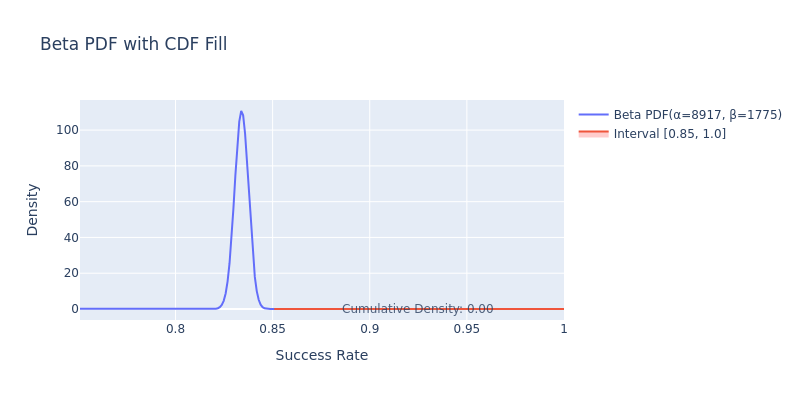

In [41]:
beta_pdf_with_cdf_fill(tn, fn, start=0.85, fig_type="png")